We want to try and find the Jacobians of the GR shallow water equations. 

In [1]:
import sympy
sympy.init_printing()

In [103]:
M, J, Q = sympy.symbols('M, J, Q', positive=True)
t, r = sympy.symbols('t, r', positive=True)
th, ph = sympy.symbols('theta, phi')

coords = t, r, th, ph


Ph = sympy.symbols('Phi', positive=True)
u, v, ut, al = sympy.symbols('u, v, u^t, alpha')
bx, by = sympy.symbols('beta^x, beta^y')

ud, vd = sympy.symbols('u_i, v_i')

vsq = u**2 + v**2
#W = al*ut
W = 1 / sympy.sqrt(1 - ud*u + vd*v)

In [4]:
w = Ph, u, v, ut
U = Ph*W, Ph*W**2*u, Ph*W**2*v, Ph*W**2*al*(ud * (u - bx/al) + vd * (v - by/al))
F_u = Ph*W*(u - bx/al), Ph*W**2*ud*(u - bx/al) + Ph, Ph*W**2*vd*(u - bx/al), Ph*W**2*(u - bx/al)*(ud*bx + vd*by - al)

In [22]:
for x in U:
    print(x.diff(Ph))
    

1/sqrt(-u*u_i + v*v_i + 1)
u/(-u*u_i + v*v_i + 1)
v/(-u*u_i + v*v_i + 1)
alpha*(u_i*(u - beta^x/alpha) + v_i*(v - beta^y/alpha))/(-u*u_i + v*v_i + 1)


In [23]:
for x in U:
    print(x.diff(u))

Phi*u_i/(2*(-u*u_i + v*v_i + 1)**(3/2))
Phi*u*u_i/(-u*u_i + v*v_i + 1)**2 + Phi/(-u*u_i + v*v_i + 1)
Phi*u_i*v/(-u*u_i + v*v_i + 1)**2
Phi*alpha*u_i*(u_i*(u - beta^x/alpha) + v_i*(v - beta^y/alpha))/(-u*u_i + v*v_i + 1)**2 + Phi*alpha*u_i/(-u*u_i + v*v_i + 1)


In [24]:
for x in U:
    print(x.diff(v))

-Phi*v_i/(2*(-u*u_i + v*v_i + 1)**(3/2))
-Phi*u*v_i/(-u*u_i + v*v_i + 1)**2
-Phi*v*v_i/(-u*u_i + v*v_i + 1)**2 + Phi/(-u*u_i + v*v_i + 1)
-Phi*alpha*v_i*(u_i*(u - beta^x/alpha) + v_i*(v - beta^y/alpha))/(-u*u_i + v*v_i + 1)**2 + Phi*alpha*v_i/(-u*u_i + v*v_i + 1)


In [29]:
for x in U:
    print(x.diff(ut))

Phi*alpha
2*Phi*alpha**2*u*u^t
2*Phi*alpha**2*u^t*v
2*Phi*alpha**3*u^t*(u_i*(u - beta^x/alpha) + v_i*(v - beta^y/alpha))


In [30]:
for x in F_u:
    print(x.diff(Ph))

alpha*u^t*(u - beta^x/alpha)
alpha**2*u^t**2*u_i*(u - beta^x/alpha) + 1
alpha**2*u^t**2*v_i*(u - beta^x/alpha)
alpha**2*u^t**2*(u - beta^x/alpha)*(-alpha + beta^x*u_i + beta^y*v_i)


In [31]:
for x in F_u:
    print(x.diff(ut))

Phi*alpha*(u - beta^x/alpha)
2*Phi*alpha**2*u^t*u_i*(u - beta^x/alpha)
2*Phi*alpha**2*u^t*v_i*(u - beta^x/alpha)
2*Phi*alpha**2*u^t*(u - beta^x/alpha)*(-alpha + beta^x*u_i + beta^y*v_i)


In [34]:
for x in F_u:
    print(x.diff(u))

Phi*u_i*(u - beta^x/alpha)/(2*(-u*u_i + v*v_i + 1)**(3/2)) + Phi/sqrt(-u*u_i + v*v_i + 1)
Phi*u_i**2*(u - beta^x/alpha)/(-u*u_i + v*v_i + 1)**2 + Phi*u_i/(-u*u_i + v*v_i + 1)
Phi*u_i*v_i*(u - beta^x/alpha)/(-u*u_i + v*v_i + 1)**2 + Phi*v_i/(-u*u_i + v*v_i + 1)
Phi*u_i*(u - beta^x/alpha)*(-alpha + beta^x*u_i + beta^y*v_i)/(-u*u_i + v*v_i + 1)**2 + Phi*(-alpha + beta^x*u_i + beta^y*v_i)/(-u*u_i + v*v_i + 1)


In [35]:
for x in F_u:
    print(x.diff(v))

-Phi*v_i*(u - beta^x/alpha)/(2*(-u*u_i + v*v_i + 1)**(3/2))
-Phi*u_i*v_i*(u - beta^x/alpha)/(-u*u_i + v*v_i + 1)**2
-Phi*v_i**2*(u - beta^x/alpha)/(-u*u_i + v*v_i + 1)**2
-Phi*v_i*(u - beta^x/alpha)*(-alpha + beta^x*u_i + beta^y*v_i)/(-u*u_i + v*v_i + 1)**2


In [67]:
ud = u
bx = 0
W = 1 / sympy.sqrt(1 - ud*u)
dudw = sympy.zeros(3,3)
dudw[0,0] = W
dudw[0,1] = Ph*ud*W**3
dudw[0,2] = Ph*al 

dudw[1,0] = W**2*ud
dudw[1,1] = Ph*W**2*(1 + 2*ud*ud*W**2)
dudw[1,2] = 2*Ph*al*W*ud

dudw[2,0] = W**2*al*ud*(u-bx/al)
dudw[2,1] = Ph*W**2*al*((1 + 2*W**2*ud*ud)*(u-bx/al) + ud)
dudw[2,2] = 2*Ph*al**2*W*ud*(u-bx/al)

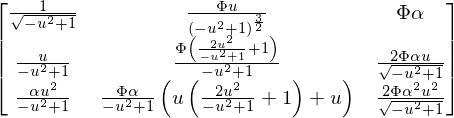

In [68]:
dudw

In [69]:
dudw_inv = dudw.inv()
dudw_inv.simplify()

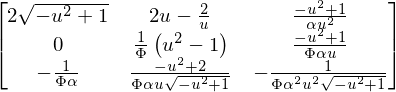

In [70]:
dudw_inv

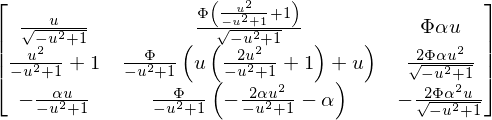

In [71]:
dfdw = sympy.zeros(3,3)

dfdw[0,0] = W*(u-bx/al)
dfdw[0,1] = Ph*W*(1 + W**2*ud*(u-bx/al))
dfdw[0,2] = Ph*al*(u-bx/al)

dfdw[1,0] = W**2*ud*(u-bx/al) + 1
dfdw[1,1] = Ph*W**2*((1 + 2*W**2*ud*u)*(u-bx/al) + u)
dfdw[1,2] = 2*Ph*al*W*ud *(u-bx/al)

dfdw[2,0] = W**2*(u-bx/al)*(ud*bx - al)
dfdw[2,1] = Ph*W**2*((u-bx/al)*(bx + 2*W**2*u*(ud*bx-al)) + (ud*bx-al))
dfdw[2,2] = 2*Ph*al*W*(u-bx/al)*(ud*bx - al)

dfdw

In [72]:
A = dfdw*dudw_inv

In [73]:
A.simplify()

In [75]:
evals = A.eigenvals()

In [81]:
P, D = A.diagonalize()

In [79]:
print(evals)

{-((-3*u**2 + 2)**2/u**2 - 3/u**2)/(3*(-1/2 + sqrt(3)*I/2)*(sqrt(-4*((-3*u**2 + 2)**2/u**2 - 3/u**2)**3 + (27*(-2*u**2 + 1)/u + 2*(-3*u**2 + 2)**3/u**3 - 9*(-3*u**2 + 2)/u**3)**2)/2 + 27*(-2*u**2 + 1)/(2*u) + (-3*u**2 + 2)**3/u**3 - 9*(-3*u**2 + 2)/(2*u**3))**(1/3)) - (-1/2 + sqrt(3)*I/2)*(sqrt(-4*((-3*u**2 + 2)**2/u**2 - 3/u**2)**3 + (27*(-2*u**2 + 1)/u + 2*(-3*u**2 + 2)**3/u**3 - 9*(-3*u**2 + 2)/u**3)**2)/2 + 27*(-2*u**2 + 1)/(2*u) + (-3*u**2 + 2)**3/u**3 - 9*(-3*u**2 + 2)/(2*u**3))**(1/3)/3 - (-3*u**2 + 2)/(3*u): 1, -((-3*u**2 + 2)**2/u**2 - 3/u**2)/(3*(sqrt(-4*((-3*u**2 + 2)**2/u**2 - 3/u**2)**3 + (27*(-2*u**2 + 1)/u + 2*(-3*u**2 + 2)**3/u**3 - 9*(-3*u**2 + 2)/u**3)**2)/2 + 27*(-2*u**2 + 1)/(2*u) + (-3*u**2 + 2)**3/u**3 - 9*(-3*u**2 + 2)/(2*u**3))**(1/3)) - (sqrt(-4*((-3*u**2 + 2)**2/u**2 - 3/u**2)**3 + (27*(-2*u**2 + 1)/u + 2*(-3*u**2 + 2)**3/u**3 - 9*(-3*u**2 + 2)/u**3)**2)/2 + 27*(-2*u**2 + 1)/(2*u) + (-3*u**2 + 2)**3/u**3 - 9*(-3*u**2 + 2)/(2*u**3))**(1/3)/3 - (-3*u**2 + 2)/(3*

In [80]:
for x in evals:
    print(x.simplify())

(2**(2/3)*u**2*((-54*u**4 + u**3*sqrt((-4*((-3*u**2 + 2)**2 - 3)**3 + (27*u**2*(-2*u**2 + 1) + 27*u**2 + 2*(-3*u**2 + 2)**3 - 18)**2)/u**6) + 54*u**2 - 2*(3*u**2 - 2)**3 - 18)/u**3)**(2/3)*(1 - sqrt(3)*I)**2 + 4*u*((u**3*sqrt((-4*((-3*u**2 + 2)**2 - 3)**3 + (27*u**2*(-2*u**2 + 1) + 27*u**2 + 2*(-3*u**2 + 2)**3 - 18)**2)/u**6) + 27*u**2*(-2*u**2 + 1) + 27*u**2 - 2*(3*u**2 - 2)**3 - 18)/u**3)**(1/3)*(1 - sqrt(3)*I)*(3*u**2 - 2) + 8*2**(1/3)*((3*u**2 - 2)**2 - 3))/(12*u**2*((u**3*sqrt((-4*((-3*u**2 + 2)**2 - 3)**3 + (27*u**2*(-2*u**2 + 1) + 27*u**2 + 2*(-3*u**2 + 2)**3 - 18)**2)/u**6) + 27*u**2*(-2*u**2 + 1) + 27*u**2 - 2*(3*u**2 - 2)**3 - 18)/u**3)**(1/3)*(1 - sqrt(3)*I))
-3*u**2/(-27*u**3 + 27*u + 3*sqrt(6)*sqrt(27*u**4 - 54*u**2 + 36 - 8/u**2 + u**(-4)) - 9/u - 1/u**3)**(1/3) + u - (-27*u**3 + 27*u + 3*sqrt(6)*sqrt(27*u**4 - 54*u**2 + 36 - 8/u**2 + u**(-4)) - 9/u - 1/u**3)**(1/3)/3 + 4/(-27*u**3 + 27*u + 3*sqrt(6)*sqrt(27*u**4 - 54*u**2 + 36 - 8/u**2 + u**(-4)) - 9/u - 1/u**3)**(1/3) -

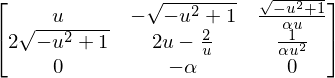

In [74]:
A

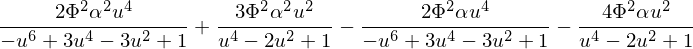

In [66]:
dudw.det()

In [78]:
evals.simplify()

AttributeError: 'dict' object has no attribute 'simplify'

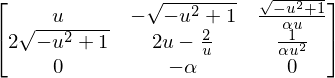

In [90]:
B = sympy.zeros(3,3)
B[0,0] = u
B[0,1] = -1/W
B[0,2] = 1/(al*u*W)
B[1,0] = 2/W
B[1,1] = 2*u - 2/u
B[1,2] = 1/(al*u**2)
B[2,1] = -al
B

In [97]:
w = sympy.symbols('w')
B = B.subs(W,w)

In [98]:
PB, DB = B.diagonalize()

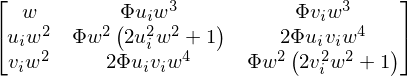

In [105]:
dudw = sympy.zeros(3,3)
dudw[0,0] = w
dudw[0,1] = Ph*ud*w**3
dudw[0,2] = Ph*vd*w**3

dudw[1,0] = w**2*ud
dudw[1,1] = Ph*w**2*(1+2*ud*ud*w**2)
dudw[1,2] = Ph*w**2*2*ud*vd*w**2

dudw[2,0] = w**2*vd
dudw[2,1] = Ph*w**2*2*ud*vd*w**2
dudw[2,2] = Ph*w**2*(1+2*vd**2*w**2)

dudw

In [106]:
dudw.det()

In [109]:
dudw_inv = dudw.inv()

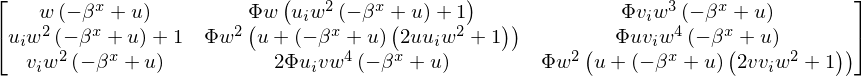

In [125]:
# set bi = 0
dfdw = sympy.zeros(3,3)

dfdw[0,0] = w*(u-bx)
dfdw[0,1] = Ph*w*(1+w**2*ud*(u-bx))
dfdw[0,2] = Ph*w*w**2*vd*(u-bx)

dfdw[1,0] = w**2*ud*(u-bx) + 1
dfdw[1,1] = Ph*w**2*((u-bx)*(1+2*w**2*ud*u)+u)
dfdw[1,2] = Ph*w**2*((u-bx)*(vd*u*w**2))

dfdw[2,0] = w**2*vd*(u-bx)
dfdw[2,1] = Ph*w**2*((u-bx)*(2*w**2*ud*v))
dfdw[2,2] = Ph*w**2*((u-bx)*(1+2*w**2*vd*v)+u)

dfdw

In [126]:
a = dfdw * dudw_inv

In [127]:
a.simplify()

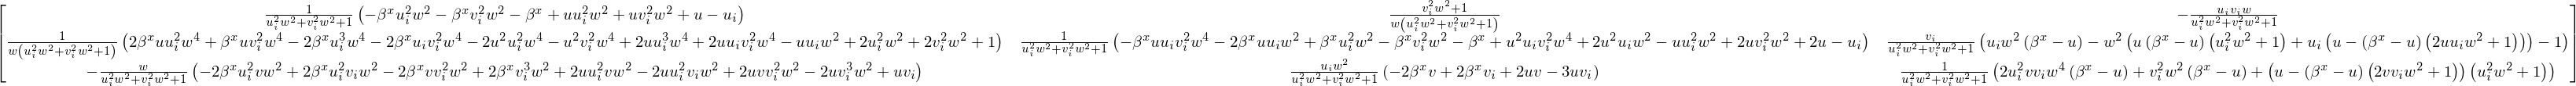

In [128]:
a

In [129]:
evals = a.eigenvals()

In [ ]:
for x in evals:
    print(x.simplify())